In [1]:
import pandas as pd
import river
from river import naive_bayes
from river import drift
from river.datasets import synth
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
# Initialize drift detectors
kswin = drift.KSWIN()
adwin = drift.ADWIN()

In [3]:
# Create dataset
dataset = synth.FriedmanDrift(
    drift_type='gra',
    position=(2, 3),
    seed=42
)

In [4]:
# Preview first 5 data points
for x, y in dataset.take(5):
    print(list(x.values()), y)


[0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, 0.029797219438070344] 7.6612066799391085
[0.026535969683863625, 0.1988376506866485, 0.6498844377795232, 0.5449414806032167, 0.2204406220406967, 0.5892656838759087, 0.8094304566778266, 0.006498759678061017, 0.8058192518328079, 0.6981393949882269] 8.330237325619887
[0.3402505165179919, 0.15547949981178155, 0.9572130722067812, 0.33659454511262676, 0.09274584338014791, 0.09671637683346401, 0.8474943663474598, 0.6037260313668911, 0.8071282732743802, 0.7297317866938179] 8.963451175779543
[0.3785343772083535, 0.552040631273227, 0.8294046642529949, 0.6185197523642461, 0.8617069003107772, 0.577352145256762, 0.7045718362149235, 0.045824383655662215, 0.22789827565154686, 0.28938796360210717] 18.160369621840488
[0.0797919769236275, 0.23279088636103018, 0.10100142940972912, 0.2779736031100921, 0.6356844442644002, 0.

In [5]:
# Initialize model
model = naive_bayes.GaussianNB()

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

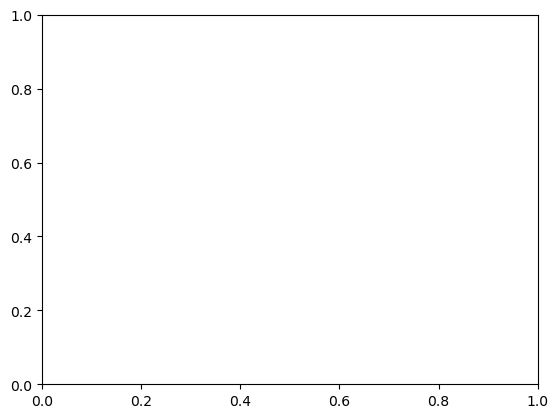

In [6]:
data = dataset.take(100)
def plot_data(data):
    for x, y in dataset.take(5):
        plt.plot(list(x.values()), y)
        
        # plotting the points   
#         plt.plot(x, y)  

    # naming the x axis  
    plt.xlabel('x - axis')  
    # naming the y axis  
    plt.ylabel('y - axis')  

    # giving a title to my graph  
    plt.title('My first graph!') 
    plt.show()

plot_data(data)

In [ ]:
# Auxiliary function to plot the data
stream = dataset.take(100)
def plot_data(stream, drifts=None):
    fig = plt.figure(figsize=(7,3), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
    ax1.grid()
    ax1.plot(stream, label='Stream')
    ax2.grid(axis='y')
    ax2.hist(stream, label=r'$dataset$')
#     ax2.hist(dist_b, label=r'$dist_b$')
#     ax2.hist(dist_c, label=r'$dist_c$')
#     if drifts is not None:
#         for drift_detected in drifts:
#             ax1.axvline(drift_detected, color='red')
    plt.show()

plot_data(stream)

In [ ]:
# Process the data stream
for i, (x, y) in enumerate(dataset.take(100)):
    # Predict
    y_pred = model.predict_one(x)

    # Update model
    model.learn_one(x, y)

    # Check for drift
    in_drift = False
    for detector_name, detector in zip(['KSWIN', 'ADWIN'], [kswin, adwin]):
        # Update the drift detector
        detector.update(1.0 if y_pred == y else 0.0)

        # Check for change
        if detector.drift_detected:
            print(f'Drift detected by {detector_name} at index {i}')
            in_drift = True

    # Optionally reset the model if drift is detected
    if in_drift:
        model = naive_bayes.GaussianNB()
        print(f'Model reset after detection by {detector_name}')
        break  # Break the loop to avoid multiple reset messages for the same drift event